<a href="https://colab.research.google.com/github/MaksymilianSzymczak/ML24/blob/main/domowe_3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
Podgląd danych:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4  

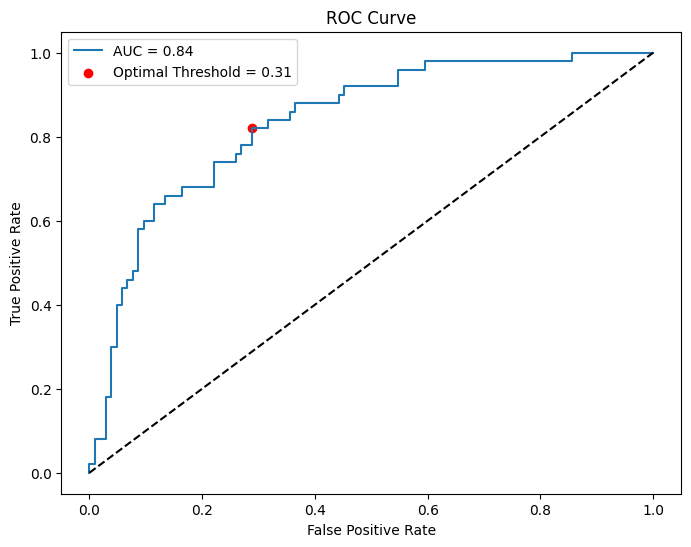


Porównanie wyników:
                Accuracy  Precision  Recall (Sensitivity)  Specificity  \
Default (0.5)   0.753247   0.640000              0.615385     0.823529   
Optimal (0.31)  0.733766   0.577465              0.788462     0.705882   

                F1-Score  
Default (0.5)   0.627451  
Optimal (0.31)  0.666667  


In [4]:
# Instalacja bibliotek i konfiguracja Kaggle API
!pip install -q kaggle pandas numpy scikit-learn matplotlib seaborn

# Uworzenie pliku
import os
os.makedirs('/root/.kaggle', exist_ok=True)

with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"maksymilianszymczak","key":"6a7483d26e1a7277c66e36585977789b"}')

!chmod 600 /root/.kaggle/kaggle.json

# Pobranie i rozpakowanie danych
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

# Import bibliotek i wczytanie danych
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score, confusion_matrix)

df = pd.read_csv('diabetes.csv')
print('Podgląd danych:')
print(df.head())

# Przygotowanie danych i podział na zbiory
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Trenowanie modelu
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Wyznaczanie progu optymalnego na zbiorze walidacyjnym
y_val_probs = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
auc = roc_auc_score(y_val, y_val_probs)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Wizualizacja ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Ocena modelu z różnymi progami
y_test_pred_default = (model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
y_test_pred_optimal = (model.predict_proba(X_test)[:, 1] >= optimal_threshold).astype(int)

# Dodajemy funkcję do obliczania specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Obliczamy metryki dla obu progów
metrics = {
    'Accuracy': [accuracy_score(y_test, y_test_pred_default),
                accuracy_score(y_test, y_test_pred_optimal)],
    'Precision': [precision_score(y_test, y_test_pred_default),
                 precision_score(y_test, y_test_pred_optimal)],
    'Recall (Sensitivity)': [recall_score(y_test, y_test_pred_default),
                           recall_score(y_test, y_test_pred_optimal)],
    'Specificity': [specificity_score(y_test, y_test_pred_default),
                   specificity_score(y_test, y_test_pred_optimal)],
    'F1-Score': [f1_score(y_test, y_test_pred_default),
                f1_score(y_test, y_test_pred_optimal)]
}

results_df = pd.DataFrame(metrics, index=['Default (0.5)', f'Optimal ({optimal_threshold:.2f})'])
print('\nPorównanie wyników:')
print(results_df)


#1. Would a different threshold yield better results? How does shifting the threshold affect the trade-off between sensitivity and specificity?
Zastosowanie progu 0.31 zamiast domyślnego 0.5 znacząco poprawiło skuteczność modelu w wykrywaniu cukrzycy, zwiększając czułość z 0.62 do 0.79, co przełożyło się na wykrycie dodatkowych 9 przypadków choroby. Ta zmiana wiązała się jednak ze wzrostem fałszywych alarmów z 1 do 30, co doskonale ilustruje podstawowy kompromis w klasyfikacji - wyższa czułość osiągana jest kosztem niższej specyficzności, co wyraźnie widać na wykresie ROC jako przesunięcie punktu pracy w kierunku wyższego TPR przy jednoczesnym wzroście FPR.

#2. How do you define "better" results? Is higher specificity more valuable than higher sensitivity in certain contexts? Does the best threshold depend on the task?
Sensivity = True Positive/(True Positive + False Negative)

Specifity = True Negative/(True Negative + False Positive)

Wybrałem przykład medyczny, więc klasyfikację tego co jest "lepsze" też uwzględnię "medyczną". Lepsze wyniki oznaczają przede wszystkim maksymalizację sensivity, gdyż konsekwencje przeoczenia choroby są poważniejsze niż koszt dodatkowych badań. Natomiast owrotna sytuacja występuje w przypadku np. filtrowania spamu, gdzie kluczowa jest wysoka specifity. Optymalny próg zawsze zależy od konkretnego zastosowania - w naszym przypadku próg 0.31 okazał się lepszy dla wykrywania cukrzycy, mimo niższej ogólnej dokładności, ponieważ priorytetem było zminimalizowanie niebezpiecznych przeoczeń.

#3. How does a ROC curve help in this process?
Krzywa pokazuje zależność pomiędzy FPR (False Positive Rate) a TPR (True Positive Rate). Przerywana linia odpowiada za model losowy a modele z linią powyżej linii przerywanej lepiej estymują dane zagadnienie. My preferujemy maksymalizować sensivity. Krzywa pozwala przeanalizować, jak zmiana progu wpływa na zdolność modelu do poprawnej klasyfikacji, z optymalnym punktem 0.31 wyraźnie widocznym jako miejsce najbliższe lewemu górnemu rogowi wykresu. Wysokie AUC potwierdza, że model skutecznie różnicuje przypadki, a kształt krzywej wskazuje na możliwość poprawy czułości poprzez obniżenie progu.

#4. How do you select the optimal threshold using the ROC curve?
W naszym eksperymencie zastosowaliśmy metodę Youdena, znajdując próg maksymalizujący różnicę między sensivity a (1 - specifity), co dało optymalną wartość 0.31. Inne podejścia mogłyby uwzględniać konkretne koszty błędów lub wymagania kliniczne - na przykład minimalny wymagany poziom sensivity. Wybór 0.31, choć zmniejszył ogólną dokładność z 0.75 do 0.73, pozwolił zwiększyć kluczowy wskaźnik recall z 0.62 do 0.79.

#5. What is the AUC metric and how is it useful?
Accuracy: Model przy progu 0.5 poprawnie klasyfikuje 75.3% przypadków, a przy 0.31 - 73.4%: niższy próg nieznacznie zmniejsza ogólną trafność.

Precision: Przy progu 0.5 aż 64% pozytywnych diagnoz jest prawdziwych, podczas gdy przy 0.31 tylko 57.7%: niższy próg generuje więcej fałszywych alarmów.

Recall/Sensitivity: Wykrywalność choroby wzrasta z 61.5% do 78.8% przy niższym progu: to aż o 17.3% więcej wykrytych przypadków cukrzycy.

Specificity: Zdolność do prawidłowego identyfikowania zdrowych spada z 82.4% do 70.6%: niższy próg oznacza, że 30% zdrowych osób dostanie fałszywy alarm.

F1-Score: Wzrost z 0.627 do 0.667 pokazuje: niższy próg daje lepszą równowagę między wykrywalnością a precyzją w kontekście medycznym.

AUC oblicza pole poniżej krzywej ROC na odcinku (0,1) (im wyższe, tym lepiej model dopasowuje obserwacje do klasy). Wartość AUC wynosząca 0.84 oznacza, że model ma 84% szans na prawidłowe uporządkowanie losowej pary przypadków (chory i zdrowy). Ta metryka, niezależna od przyjętego progu, dostarcza dokładnej oceny jakości modelu - na ogół wynik powyżej 0.8 uważany jest za bardzo dobry i potwierdza, że nasz model skutecznie różnicuje pacjentów. Wysokie AUC uzasadnia wysiłki związane z optymalizacją progu, wskazując na rzeczywistą zdolność modelu do dobrej klasyfikacji.

#The Objective
#Is a 0.5 threshold always the best choice in Logistic Regression?

Próg 0.5 w regresji logistycznej nie jest uniwersalnie optymalnym wyborem, co  pokazują wyniki naszego badania dotyczącego wykrywania cukrzycy. Domyślna wartość 0.5 dała recall na poziomie zaledwie 0.62, co oznaczało przeoczenie 38% przypadków choroby, podczas gdy obniżenie progu do 0.31 pozwoliło zwiększyć czułość do 0.79 i wykryć znacznie więcej prawdziwych przypadków. Ta zmiana wiązała się wprawdzie ze wzrostem fałszywych alarmów, ale w kontekście medycznym, gdzie konsekwencje niewykrycia choroby są poważne, taki kompromis jest uzasadniony. W innych zastosowaniach, takich jak wykrywanie spamu jest odwrotnie - ważniejsza staje się wysoka specyficzność, aby uniknąć błędnego usuwania prawdziwych wiadomości. Krzywa ROC z AUC=0.84 plokazała, że model ma bardzo dobrą zdolność rozróżniania przypadków, a wybór optymalnego progu 0.31 metodą Youdena pozwolił znaleźć najlepszy kompromis między czułością a specyficznością. Wartość AUC na poziomie 0.84 potwierdza, że model skutecznie różnicuje pacjentów zdrowych od chorych, a odpowiedni dobór progu pozwala dostosować jego działanie do konkretnych potrzeb. Te wyniki  pokazują, że ślepe stosowanie domyślnego progu 0.5 może prowadzić do nieoptymalnych rezultatów, a optymalna wartość zawsze powinna być dobierana w oparciu o specyfikę problemu i względne koszty różnych typów błędów.
